# Project description


You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. 

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.


The aim of the project is to identify patterns that determine whether a game succeeds or not. This analysis will allow to spot potential big winners and plan advertising campaigns. 
The goal is to plan a campaign for 2017 using data from 2016.



Hypotheses of the project are:-

1. Average user ratings of the Xbox One and PC platforms are the same.

2. Average user ratings for the Action and Sports genres are different.


## Initialization

In [7]:
# Loading all the libraries

import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [190]:
# Reed the dataset
try:
    games = pd.read_csv('https://code.s3.yandex.net/games.csv')
except:
    games = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [9]:
# Load the data file into DataFrame

# games = pd.read_csv('/datasets/games.csv')

## Data description

The project contains the following DataFrame:



* Name
* Platform
* Year_of_Release
* Genre
* NA_sales (North American sales in USD million)
* EU_sales (sales in Europe in USD million)
* JP_sales (sales in Japan in USD million)
* Other_sales (sales in other countries in USD million)
* Critic_Score (maximum of 100)
* User_Score (maximum of 10)
* Rating (ESRB)

Data for 2016 may be incomplete.

The abbreviation ESRB means Entertainment Software Rating Board

In [10]:
# Print the general/summary information about the games DataFrame
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [11]:
# To know the number of columns and rows in the DataFrame
games.shape

(16715, 11)

In [12]:
# Check data type of the DataFrame
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

In [13]:
# To get information about statistical character of the DataFrame
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [14]:
games.duplicated().sum()

0

In [15]:
# To confirm the missing values of the DataFrame
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [16]:
# To get the percentile information of the columns in the dataframe
games.isnull().sum()*100/len(games)


Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [17]:
# To get the number of missing values
report = games.isna().sum().to_frame()
report

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,8578
User_Score,6701


In [18]:
# Second way of getting missing values
report = report.rename(columns = {0: 'missing_values'})
report

,missing_values
Name,2
Platform,0
Year_of_Release,269
Genre,2
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,8578
User_Score,6701


In [19]:
# Percentile of the missing values
games.isnull().sum()/len(games)

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [20]:
# Percentile of the missing values rounded to three digits
report['% of total'] = (report['missing_values'] * 100 / games.shape[0]).round(3)
report['% of total']

Name                0.012
Platform            0.000
Year_of_Release     1.609
Genre               0.012
NA_sales            0.000
EU_sales            0.000
JP_sales            0.000
Other_sales         0.000
Critic_Score       51.319
User_Score         40.090
Rating             40.479
Name: % of total, dtype: float64

In [21]:
# Arranging missing values and the percentile in descending order
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
Critic_Score,8578,51.319
Rating,6766,40.479
User_Score,6701,40.090
Year_of_Release,269,1.609
Name,2,0.012
Genre,2,0.012
Platform,0,0.000
NA_sales,0,0.000
EU_sales,0,0.000
JP_sales,0,0.000


The percentile of the missing values of the DataFrame are given above, Critic_Score is 51.319%, Rating is 40.479%, User_Score is 40.090%, Year_of_Release is 1.609% and so on.

In [22]:
# Print a sample of DataFrame for gamess
games.head(10)


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


###### Conclusion
* The DataFrame games has 16715 rows and 11 columns. 
* The DataFrame has object and float64 data types. 
* It is confirmed the DataFrame has no duplicates in the data.
* The DataFrame has missing values on Name, Platform, Year_of_release, Genre, Critic_score and Rating. 
* It looks the DataFrame needs to convert data into the required types and replace the column names with lowercase. 
* 6 out of 11 rows are numeric. 
* User_Score is categorized as object but it should be float64 as it has float numbers.


## Data Preprocessing

In [23]:
# To check whether column's name are written in appropriate way
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [24]:
# To replace the column names with lowercase
games.columns = games.columns.str.lower()

In [25]:
# To confirm whether the column names are replaced by lowercase
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [26]:
# Sample of the DataFrame
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [27]:
# To convert the data type of year_of_release from float64 into int64
games['year_of_release'] = games['year_of_release'].astype('Int64', errors = 'ignore')

In [28]:
# To confirm the data type of a column
games['year_of_release'].dtypes

Int64Dtype()

In [29]:
# General information about the data
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [30]:
# Confirm the data type of the 'user_score' column
games['user_score'].dtypes

dtype('O')

In [31]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


When I tried to fix the data type of the 'user_score' column, it retrieves error. i decided to check the unique values of the column

In [32]:
# Checking the unique values of the column 'user_score'
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Refering to the above result, the data type of the column 'user_score' is object even though most of the values are numeric. This is happened because there is or are value or values "tbd" in the column. It is sensible to know the amounts of "tbd" values in the column 'user_score'.

In [33]:
# To confirm whether the data type is converted
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [34]:
# To find the amount of "tbd" value or values in the column 'user_score'. It can be used one of the following
games['user_score'].value_counts()['tbd']

2424

In [35]:
# Second way of getting the amount of values "tbd" in the column 'user_score'
games[games.user_score == 'tbd'].shape[0]

2424

In [36]:
# Another way of getting the amount of values "tbd" in the column 'user_score'
len(games[games.user_score == 'tbd'])

2424

In [37]:
# Another way of getting the amount of values "tbd" in the column 'user_score'
(games['user_score'] == 'tbd').sum()

2424

In [38]:
# Another way of getting the amount of values "tbd" in the column 'user_score'
games.loc[games['user_score'] == 'tbd']['user_score'].count()

2424

The number of "tbd" values in the column 'user_score' are 2424. It is better to conver them to nan to simplify for analysis.

In [39]:
# Replaceing the value "tbd" by nan
games['user_score'] = games['user_score'].replace('tbd', np.nan)
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [40]:
# Another way of replacing "tbd" by nan.
games.loc[games['user_score'] == 'tbd'] = np.nan
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [41]:
# Confirm if the the 'tbd' is replaced by NaN
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


It is confirmed that the value "tbd" is replaced by nan.

In [42]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [43]:
# Converting the data type of the 'user_score' column from object into float64.
games['user_score'] = games['user_score'].astype('float64')

In [44]:
# To confirm that whether the data type for 'user_score' is converted from object to float64
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


It is confirmed the data type for 'user_score' is converted from object to float64.


In [45]:
# Check the sample data
games.sample(10) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13937,Gitaroo Man Lives!,PSP,2006,Misc,0.03,0.00,0.00,0.00,NaN,NaN,NaN
1642,Parfait: Chocolat Second Style,PS2,2006,Adventure,0.59,0.46,0.01,0.15,NaN,NaN,NaN
16125,Katekyoo Hitman Reborn Nerae!? Ring x Bongole ...,PS2,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
15931,Otona no Renai Shousetsu: Harlequin Selection,DS,2010,Misc,0.00,0.00,0.02,0.00,NaN,NaN,NaN
4008,Ridge Racer 3D,3DS,2011,Racing,0.19,0.15,0.12,0.03,75.0,7.2,E
4477,Spec Ops: Covert Assault,PS,2001,Shooter,0.24,0.16,0.00,0.03,NaN,NaN,T
3108,The Last Story,Wii,2011,Role-Playing,0.30,0.13,0.18,0.04,80.0,8.4,T
4551,The Legend of Spyro: The Eternal Night,PS2,2007,Platform,0.21,0.16,0.00,0.05,54.0,5.4,E10+
3592,Dogz,DS,2006,Simulation,0.50,0.01,0.00,0.04,NaN,7.8,E
14790,Pro Cast Sports Fishing,XB,2003,Sports,0.02,0.01,0.00,0.00,49.0,NaN,E


In [46]:
games['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [47]:
# Get information
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [48]:
# To confirm the missing values
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [49]:
# To locate the exact place of NaN values in the 'name' column 
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [50]:
# Second way of locating the exact place of NaN values in the 'name' column 
games.loc[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [51]:
# To find the unique values
games['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [52]:
# To locate the exact place of NaN values in the 'year_of_release' column 
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [53]:
# To find the unique values
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [54]:
# To locate the exact place of NaN values in the 'critic_score' column 
games[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [55]:
# To find the unique values
games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [56]:
# To locate the exact place of NaN values in the 'user_score' column
games.loc[games['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [57]:
# To find the unique values
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [58]:
# To locate the exact place of NaN values in the 'rating' column
games.loc[games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


It has been confirmed the unique values of the columns and located the missing values.

### Missing Values

In [59]:
# Check one more time the missing values
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [60]:
# To get the percentile information of the columns in the dataframe
games.isnull().sum()*100/len(games)

name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         54.591684
rating             40.478612
dtype: float64

The three columns of the "games" DataFrame 'name', 'year_of_release' and 'genre' have 0.011965%, 1.609333% and 0.011965% missing values which is less than 10% of the DataFrame. I decided to drop them from the DataFrame because they do'nt have much influence in the data.

In [61]:
# Dropping the NaN values of the 'name', 'year_of_release' and 'genre' columns from the DataFrame
games = games.dropna(subset=['name', 'year_of_release', 'genre'])

In [62]:
# Confirm the missing values of 'name' column
games['name'].isnull().sum()

0

In [63]:
# Confirm the missing values of 'year_of_release' column
games['year_of_release'].isnull().sum()

0

In [64]:
# Confirm the missing values of 'genre' column
games['genre'].isnull().sum()

0

In [65]:
# General information about the data
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [66]:
# To confirm the missing values of the DataFrame
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

It is confirmed that the missing values of 'name', 'year_of_release' and 'genre' columns dropped from the DataFrame "games". We remained only with 'critic_score', 'user_score', and 'rating' columns. The 'rating' column is categorical (qualitative) variable we can use only mode to fill its missing values whereas the 'critic_score', 'user_score' columns are quantitative variables and their missing values can be filled either by mean or median depending on the vaues of maximum and minimum.  

In [67]:
# The mean value of 'critic_score'
games['critic_score'].mean()

68.99436302142053

In [68]:
# The mean value of 'critic_score'
games['critic_score'].median()

71.0

In [69]:
# To know the statistical character of the column
games['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

The 'critic_score' column has 13, 98, 68.99 and 71 minimum, maximun, mean and median values respectively. There is no much difference between mean and median values. To fill the missing values we can user either mean or median. It will not affect that much. I prefered mean value to fill the missing values.

In [70]:
# Statistical behavior of the column
games['user_score'].describe()

count    7463.000000
mean        7.126330
std         1.499447
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

The 'user_score' column has 0, 9.7, 7.12 and 7.5 minimum, maximun, mean and median values respectively. There is no much difference between mean and median values, almost the same. To fill the missing values we can user either mean or median. I prefered mean value to fill the missing values.

In [71]:
critic_mean = games['critic_score'].mean()
critic_mean

68.99436302142053

In [72]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [73]:
user_mean = games['user_score'].mean()
user_mean

7.1263298941444955

In [74]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [75]:
# To get the percentile information of the columns in the dataframe
games.isnull().sum()*100/len(games)

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.453418
user_score         54.615665
rating             40.598395
dtype: float64

Since the missing percentile for 'critic_score', 'user_score' and 'rating' are 51.45%, 54.61% and 40.59% respectively. Instead of filling the missing values I prefered to leave them as they are because almost half of the data will be filled and it may distort the analysis.

I decided to fill the NaN values of the 'rating' column with "Unknown" in order to be eay in evaluating the regions profile.

In [76]:
# Fillin the NaN values of the 'rating' column
games['rating'].fillna('Unknown', inplace = True)
games['rating']

0              E
1        Unknown
2              E
3              E
4        Unknown
          ...   
16710    Unknown
16711    Unknown
16712    Unknown
16713    Unknown
16714    Unknown
Name: rating, Length: 16444, dtype: object

In [77]:
# To confirm if the NaN values of the 'rating' column are filled with Unknown
games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
393,FIFA Soccer 2003,PS2,2002,Sports,0.46,2.28,0.05,0.61,88.0,6.7,E
7318,College Hoops 2K7,X360,2006,Sports,0.20,0.00,0.00,0.02,82.0,8.2,E
1039,Star Ocean: Till The End of Time,PS2,2003,Role-Playing,0.80,0.21,0.55,0.15,80.0,7.7,T
2026,Sonic Unleashed,PS3,2008,Platform,0.56,0.32,0.01,0.14,54.0,7.9,E10+
8438,Bomberman Land,Wii,2007,Misc,0.11,0.01,0.03,0.01,57.0,8.0,E
5556,SWAT: Global Strike Team,PS2,2003,Shooter,0.16,0.12,0.00,0.04,69.0,7.8,M
6784,Spawn the Eternal,PS,1997,Action,0.14,0.09,0.00,0.02,NaN,NaN,Unknown
955,Sonic Classic Collection,DS,2010,Platform,0.92,0.73,0.00,0.17,70.0,7.5,E
9524,Alter Echo,PS2,2003,Shooter,0.06,0.05,0.00,0.02,62.0,7.0,T
7727,MLB 16: The Show,PS3,2016,Action,0.16,0.00,0.00,0.04,NaN,NaN,Unknown


In [78]:
# To confirm if the NaN values of the 'rating' column are filled with Unknown
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [79]:
# Check the sample of the DataFrame 
games.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16705,15 Days,PC,2009,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,Unknown
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.0,NaN,NaN,T
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.0,NaN,NaN,Unknown
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.0,NaN,NaN,Unknown
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.0,NaN,NaN,Unknown
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,Unknown
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.0,NaN,NaN,Unknown
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,Unknown
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.0,NaN,NaN,Unknown
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,Unknown


The Missing values of 'critic_score', 'user_score' and 'rating' are 51.319174%, 54.591684%, and 40.478612% respectively. They are big numbers, we can't drop them. We need to study them how to fix the missing values. I prefered to keep them for the time being as they can distort the data and lead to unexpected conclusion.   

In [80]:
# Confirm all the missing values are fixed
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


The four regional sales are 'na_sales', 'eu_sales', 'jp_sales' and 'other_sales'. The total sales will be the sum of the above four sales. Total sales will be represented by 'total_sales' column.

In [81]:
# Calclating the total sales
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games['total_sales'].head(5)

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

In [82]:
# Second method calculating the total sales 
games['total_sales'] = games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
games['total_sales'].head(5)

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: total_sales, dtype: float64

In [83]:
# Confirm the general information about the data
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unknown,28.31


###### Conclusion

* Six variables had missing values out of eleven.
* The 'name', 'year_of_release' and 'genre' were dropped from the DataFrame as they were less than 10% of the data.
* Missing values for 'critic_score', 'user_score' and 'rating' are left as they are because they are almost 50% of the data.
* The number of "tbd" values in the column 'user_score' were 2424 and they are converted into NaN value.
* The data type of 'year_of_release' converted from float64 into int64.
* The data type of 'user_score' converted from object into float64.
* A new column 'total_sales' created in the DataFrame "games".

## Analysing Data

Look at how many games were released in different years. Is the data for every period significant?

In [84]:
# Grouping the data by 'year_of_release' column
games.groupby(['year_of_release','name']).count().head(15)

platform  genre  na_sales  eu_sales  \
year_of_release name                                                      
1980            Asteroids                  1      1         1         1   
                Boxing                     1      1         1         1   
                Bridge                     1      1         1         1   
                Checkers                   1      1         1         1   
                Defender                   1      1         1         1   
                Freeway                    1      1         1         1   
                Ice Hockey                 1      1         1         1   
                Kaboom!                    1      1         1         1   
                Missile Command            1      1         1         1   
1981            Adventures of Tron         1      1         1         1   
                Air Raid                   1      1         1         1   
                Airlock                    1      1         1         1   
                Alien                      1      1         1         1   
                Armor Ambush               1      1         1         1   
                Astroblast                 1      1         1         1   

                                    jp_sales  other_sales  critic_score  \
year_of_release name                                                      
1980            Asteroids                  1            1             0   
                Boxing                     1            1             0   
                Bridge                     1            1             0   
                Checkers                   1            1             0   
                Defender                   1            1             0   
                Freeway                    1            1             0   
                Ice Hockey                 1            1             0   
                Kaboom!                    1            1             0   
                Missile Command            1            1             0   
1981            Adventures of Tron         1            1             0   
                Air Raid                   1            1             0   
                Airlock                    1            1             0   
                Alien                      1            1             0   
                Armor Ambush               1            1             0   
                Astroblast                 1            1             0   

                                    user_score  rating  total_sales  
year_of_release name                                                 
1980            Asteroids                    0       1            1  
                Boxing                       0       1            1  
                Bridge                       0       1            1  
                Checkers                     0       1            1  
                Defender                     0       1            1  
                Freeway                      0       1            1  
                Ice Hockey                   0       1            1  
                Kaboom!                      0       1            1  
                Missile Command              0       1            1  
1981            Adventures of Tron           0       1            1  
                Air Raid                     0       1            1  
                Airlock                      0       1            1  
                Alien                        0       1            1  
                Armor Ambush                 0       1            1  
                Astroblast                   0       1            1

In [85]:
# Grouping the games by the 'year_of_release'
games_year = games.groupby(['year_of_release'])['name'].count()
games_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

In [86]:
# Gruoping the "games" release in the specified year
games.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


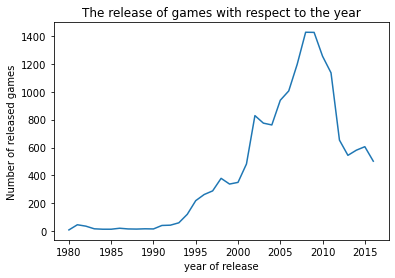

In [87]:
# Plot of the release of games with respect to the year 
games_year.plot()
plt.title('The release of games with respect to the year')
plt.xlabel('year of release')
plt.ylabel('Number of released games')
plt.show ()

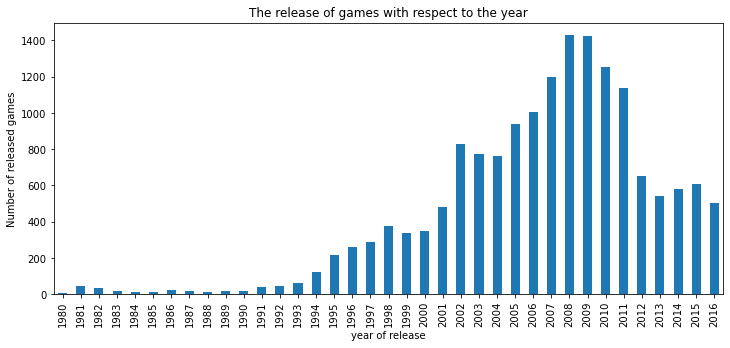

In [88]:
# Bar graph of the release of games with respect to the year 
games_year.plot.bar(figsize=(12, 5))
plt.title('The release of games with respect to the year')
plt.xlabel('year of release')
plt.ylabel('Number of released games')
plt.show()


In the 80's and early 90's the release of games were almost constant. From the mid of 90's the release of games were increasing and becomes maximum around 2007 - 2009. From 2010 the release of game started to decline.

Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [89]:
# Gruoping the 'platform' with respect to thye 'total_sales'
games_platform = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'count')
games_platform

,total_sales
platform,
2600,116
3DO,3
3DS,512
DC,52
DS,2121
GB,97
GBA,811
GC,542
GEN,27


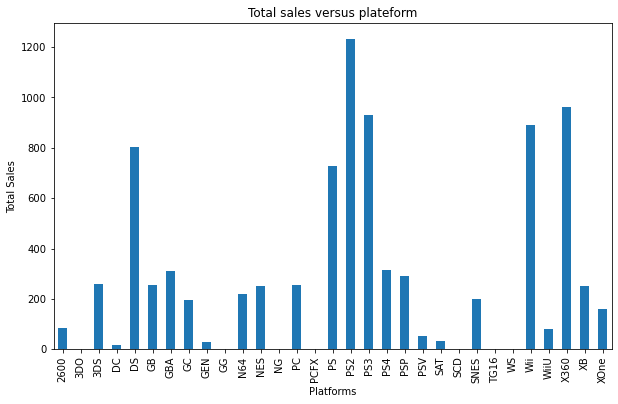

In [90]:
games.groupby(['platform'])['total_sales'].sum().plot(kind = 'bar', title = 'Total sales versus plateform' ,ylabel = 'Total Sales', xlabel = 'Platforms', figsize = (10, 6))
plt.show()

In [91]:
# Platform unique values
games.groupby('platform').sum().sort_values('total_sales', ascending=False).index


Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS',
       'PC', 'GB', 'XB', 'NES', 'N64', 'SNES', 'GC', 'XOne', '2600', 'WiiU',
       'PSV', 'SAT', 'GEN', 'DC', 'SCD', 'NG', 'WS', 'TG16', '3DO', 'GG',
       'PCFX'],
      dtype='object', name='platform')

In [92]:
# 'platform' column descending order based on total_sales
games.groupby('platform').sum().sort_values('total_sales', ascending=False)


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
PS2,4263750,572.92,332.63,137.54,190.47,87611.0,9302.9,1233.56
X360,2476173,595.74,268.32,12.30,84.88,61405.0,6313.3,961.24
PS3,2626158,390.13,327.21,79.41,134.59,56657.0,5785.5,931.34
Wii,2583531,486.87,258.32,68.28,77.71,35658.0,3692.4,891.18
DS,4259361,380.31,188.41,175.02,59.04,45120.0,3595.6,802.78
PS,2377627,334.72,212.39,139.78,40.69,14031.0,1249.5,727.58
PS4,789937,108.74,141.09,15.96,48.35,18167.0,1734.3,314.14
GBA,1624604,184.12,74.59,46.56,7.61,28944.0,1925.0,312.88
PSP,2396417,107.27,65.62,75.88,40.76,30796.0,3025.0,289.53


The top 10 'paltform' based on 'total_sales' are PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP and 3DS.

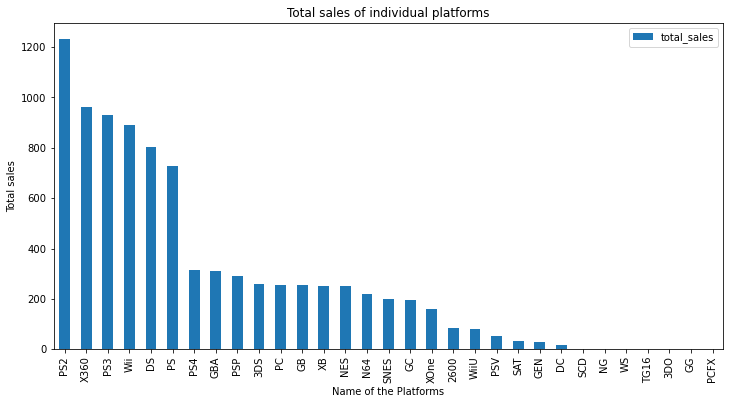

In [93]:
# The bar graph of the 'platform' with respect to the 'total_sales'.
games.pivot_table(index='platform',values=['total_sales'],aggfunc=('sum')).sort_values(by='total_sales',ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Total sales of individual platforms')
plt.xlabel('Name of the Platforms')
plt.ylabel('Total sales')
plt.show ()

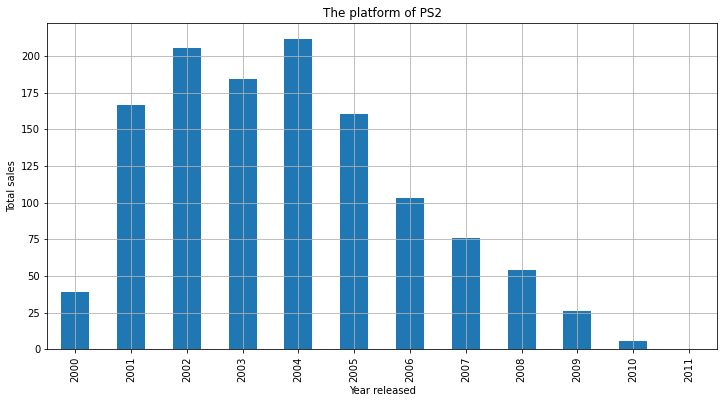

In [94]:
# The bar plot of the "PS2" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "PS2"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of PS2')
plt.show()

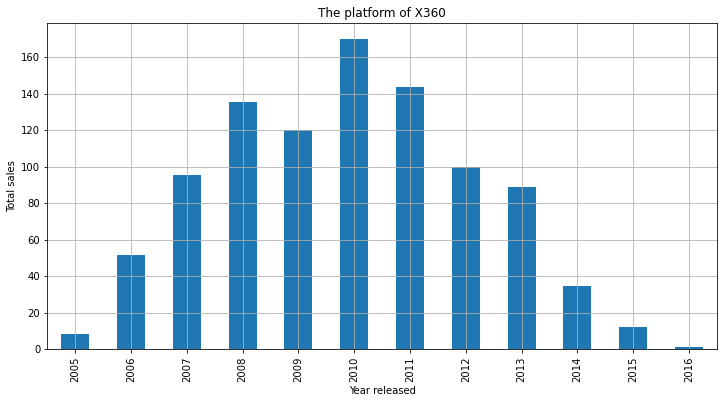

In [95]:
# The bar plot of the "X360" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "X360"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of X360')
plt.show()

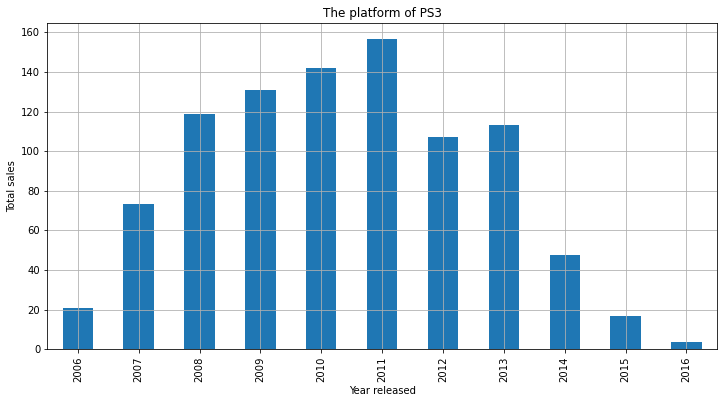

In [96]:
# The bar plot of the "PS3" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "PS3"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of PS3')
plt.show()

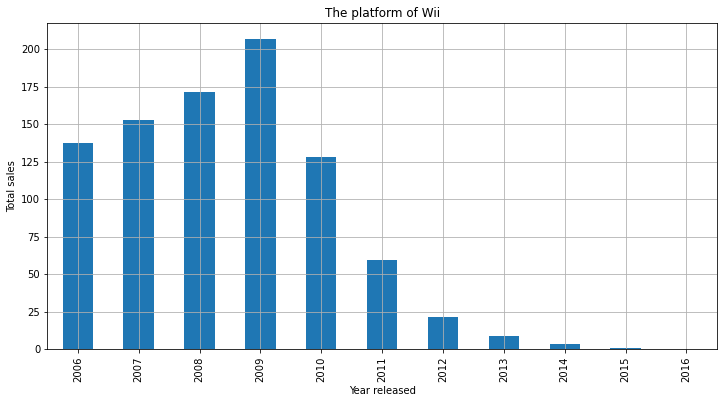

In [97]:
# The bar plot of the "Wii" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "Wii"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of Wii')
plt.show()

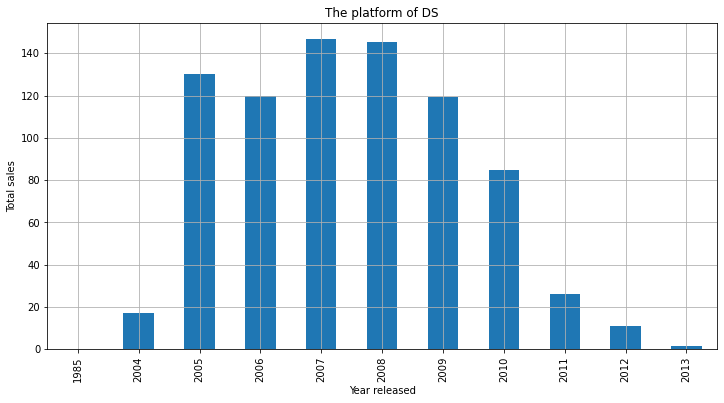

In [98]:
# The bar plot of the "DS" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "DS"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of DS')
plt.show()

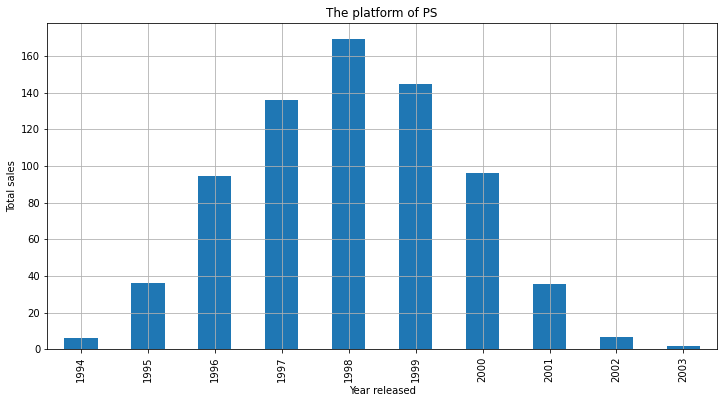

In [99]:
# The bar plot of the "PS" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "PS"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of PS')
plt.show()

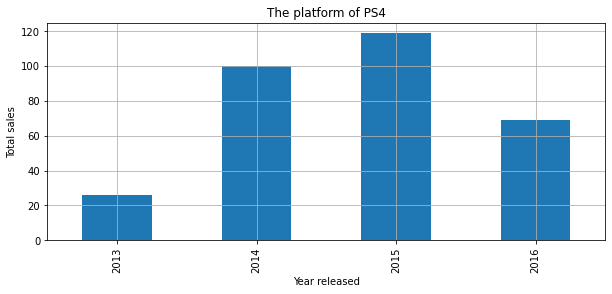

In [100]:
# The bar plot of the "PS4" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "PS4"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(10,4))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of PS4')
plt.show()

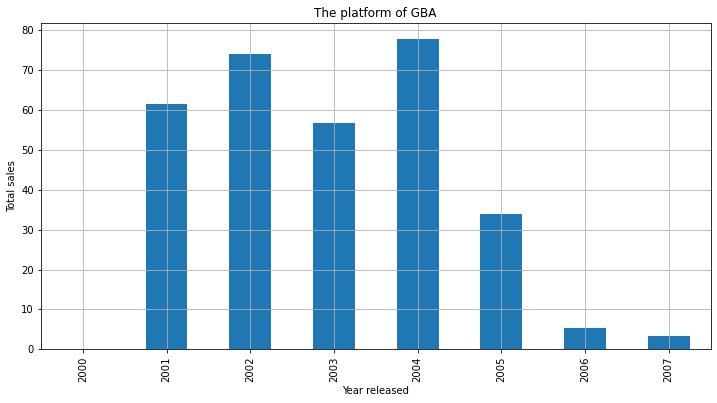

In [101]:
# The bar plot of the "GBA" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "GBA"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of GBA')
plt.show()

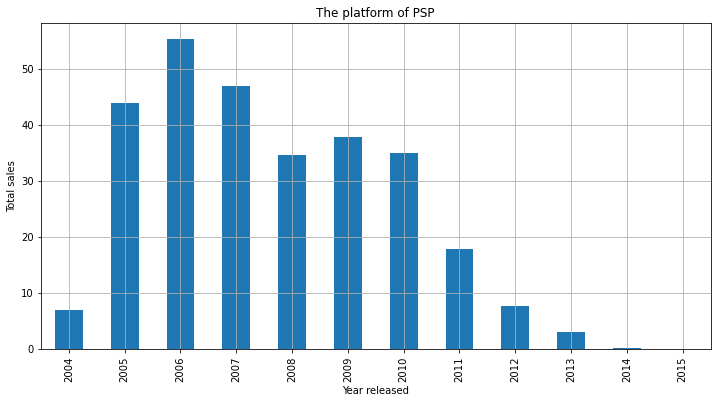

In [102]:
# The bar plot of the "PSP" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "PSP"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of PSP')
plt.show()

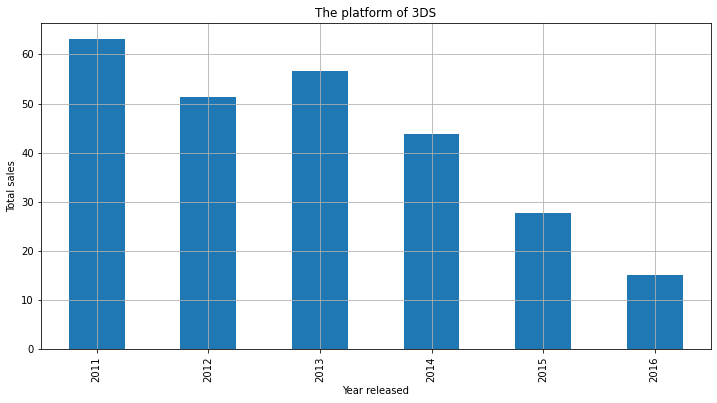

In [103]:
# The bar plot of the "3DS" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "3DS"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of 3DS')
plt.show()

The platforms that used to be popular but now have zero sales are PS2, X360, PS3, Wii, DS, PS and PSP. But PS$, GBA and 3DS have some values.

Refering to the graphs the new games took generally 2 to 3 year to appear. The old one start to get fade after staying being popular for 4 to 5 years.

Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

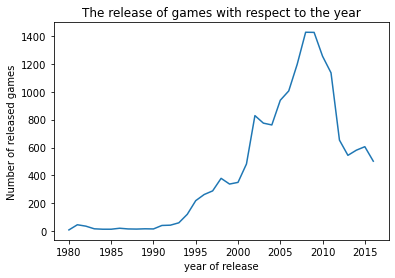

In [104]:
# games.groupby(['year_of_release'])['name'].count().plot()
games_year.plot()
plt.title('The release of games with respect to the year')
plt.xlabel('year of release')
plt.ylabel('Number of released games')
plt.show ()

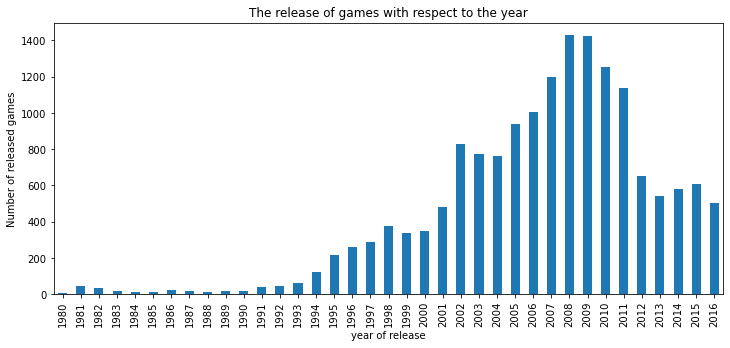

In [105]:
games_year.plot.bar(figsize=(12, 5))
plt.title('The release of games with respect to the year')
plt.xlabel('year of release')
plt.ylabel('Number of released games')
plt.show()


Work only with the data that you've decided is relevant. Disregard the data for previous years.

Refering to the above two graphs the number of games created before 1994 were very few but from 1995 onwards more than 200 games were creating every year. In order to help me to build a prognosis for 2017 I disregard the games created before 2008. The DataFrame "games" will have only games created between 2000 and 2016.

As the lifespan of the games is 4-5 year, I prefered to focus on from 2012 to 2016.

In [106]:
# The discarded games
games_discarded = games.loc[games['year_of_release'] < 2012]

In [107]:
# The amount of discarded games and their behavior
games_discarded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13558 entries, 0 to 16713
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             13558 non-null  object 
 1   platform         13558 non-null  object 
 2   year_of_release  13558 non-null  Int64  
 3   genre            13558 non-null  object 
 4   na_sales         13558 non-null  float64
 5   eu_sales         13558 non-null  float64
 6   jp_sales         13558 non-null  float64
 7   other_sales      13558 non-null  float64
 8   critic_score     6671 non-null   float64
 9   user_score       5932 non-null   float64
 10  rating           13558 non-null  object 
 11  total_sales      13558 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.4+ MB


Before 2012, 13,558 games were created, but I discarded them from the DataFrame as the lifespan of the platforms is only 4-5 years.

In [108]:
# The relevant games from 1995 and 2016
games = games.loc[games['year_of_release'] >= 2012]

In [109]:
# Characteristics of the remaining data
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   Int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 295.9+ KB


Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

In [110]:
# Getting the unique values of the columns
games['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [111]:
games.notnull().sum()

name               2886
platform           2886
year_of_release    2886
genre              2886
na_sales           2886
eu_sales           2886
jp_sales           2886
other_sales        2886
critic_score       1312
user_score         1531
rating             2886
total_sales        2886
dtype: int64

In [112]:
games['platform'].notnull().sum()

2886

In [113]:
# Gruoping the 'platform' with respect to the 'total_sales'
games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'count')


,total_sales
platform,
3DS,396
DS,31
PC,250
PS3,493
PS4,392
PSP,173
PSV,411
Wii,54
WiiU,147


In [114]:
# 'platform' column descending order based on total_sales
games.groupby('platform').sum().sort_values('total_sales', ascending=False)

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
platform,,,,,,,,
PS4,789937,108.74,141.09,15.96,48.35,18167.0,1734.3,314.14
PS3,992629,103.38,106.86,35.29,43.26,15315.0,1848.8,288.79
X360,587862,140.05,74.52,1.57,20.40,12119.0,1461.9,236.54
3DS,797445,55.31,42.64,87.79,8.87,7261.0,801.8,194.61
XOne,497693,93.12,51.59,0.34,14.27,12392.0,1186.9,159.32
WiiU,296008,38.10,25.13,13.01,5.95,6366.0,690.4,82.19
PC,503498,19.12,37.76,0.00,5.77,15016.0,1324.3,62.65
PSV,827865,10.98,11.36,21.04,5.80,7632.0,963.3,49.18
Wii,108688,17.45,11.92,3.39,2.61,381.0,103.4,35.37


In [115]:
# The relationship between the 'platform' and 'total_sales'
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64

The top 10 'paltform' based on 'total_sales' are PS4, PS3, X360, 3DS, XOne, WiiU, PC, PSV, Wii, and DS.

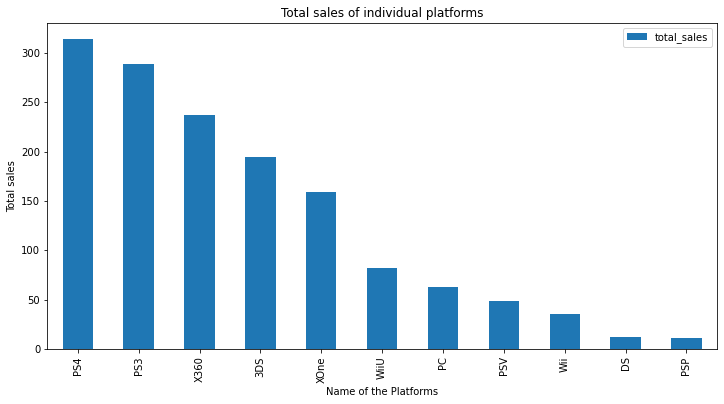

In [116]:
# The bar graph of the 'platform' with respect to the 'total_sales'.
games.pivot_table(index='platform',values=['total_sales'],aggfunc=('sum')).sort_values(by='total_sales',ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Total sales of individual platforms')
plt.xlabel('Name of the Platforms')
plt.ylabel('Total sales')
plt.show ()

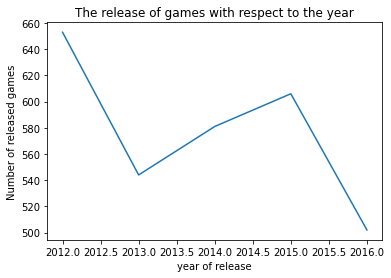

In [117]:
games.groupby(['year_of_release'])['platform'].count().plot()
plt.title('The release of games with respect to the year')
plt.xlabel('year of release')
plt.ylabel('Number of released games')
plt.show ()

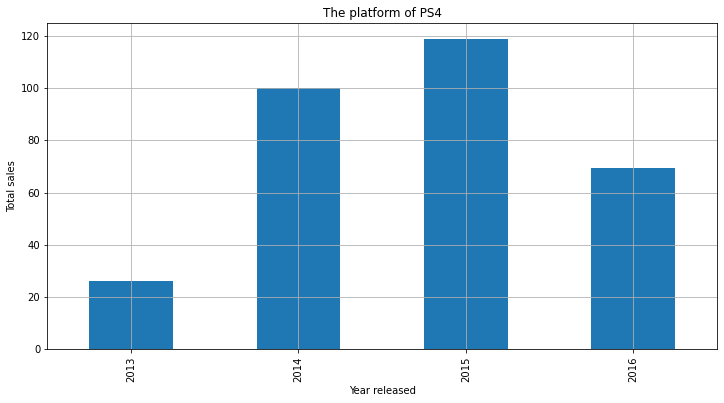

In [118]:
# The bar plot of the "PS4" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "PS4"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of PS4')
plt.show()

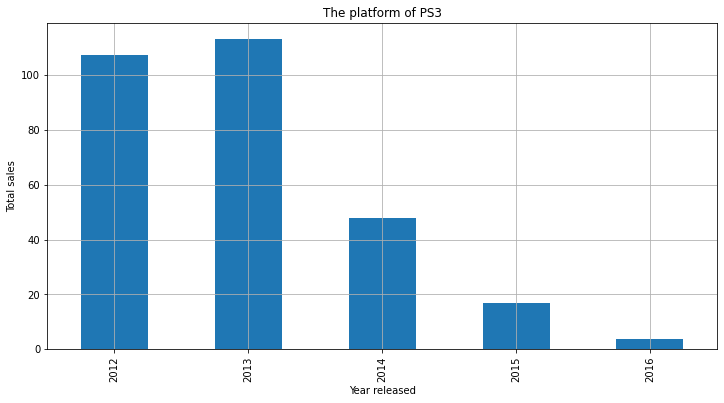

In [119]:
# The bar plot of the "PS3" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "PS3"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of PS3')
plt.show()

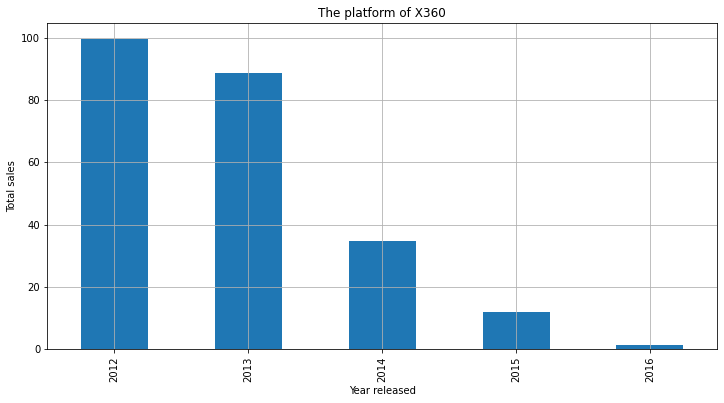

In [120]:
# The bar plot of the "X360" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "X360"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of X360')
plt.show()

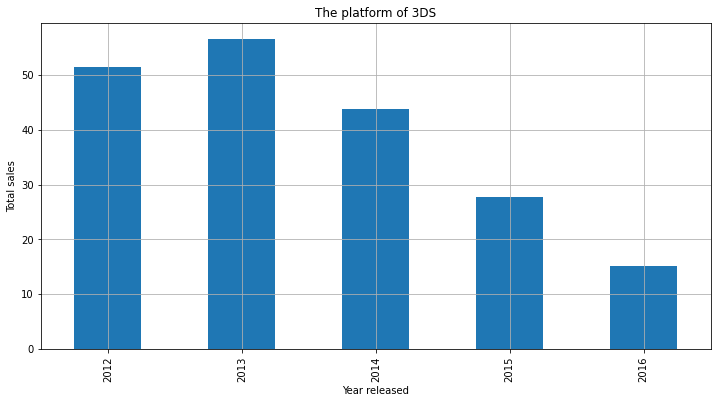

In [121]:
# The bar plot of the "3DS" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "3DS"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of 3DS')
plt.show()

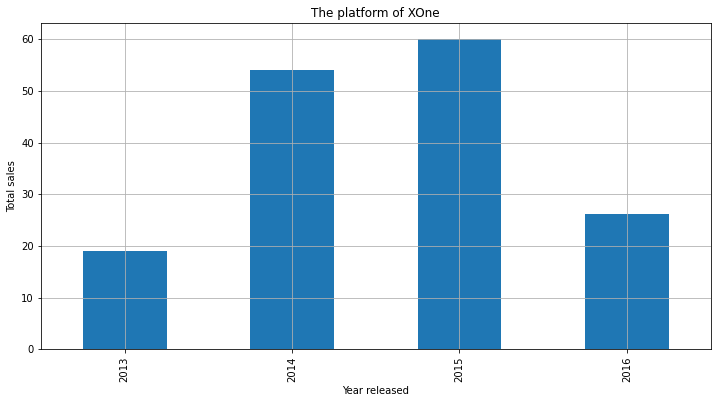

In [122]:
# The bar plot of the "XOne" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "XOne"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of XOne')
plt.show()

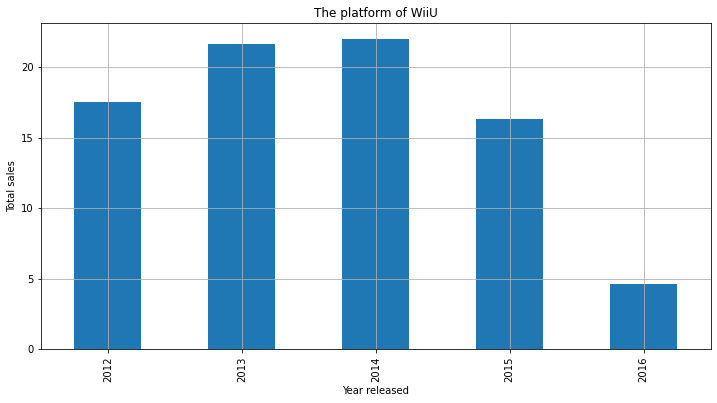

In [123]:
# The bar plot of the "WiiU" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "WiiU"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of WiiU')
plt.show()

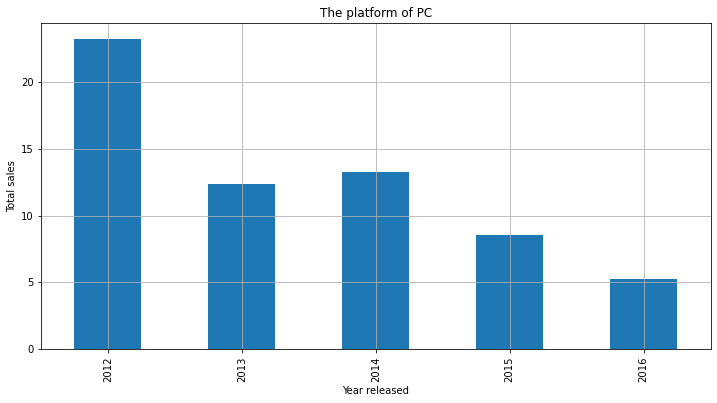

In [124]:
# The bar plot of the "PC" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "PC"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of PC')
plt.show()

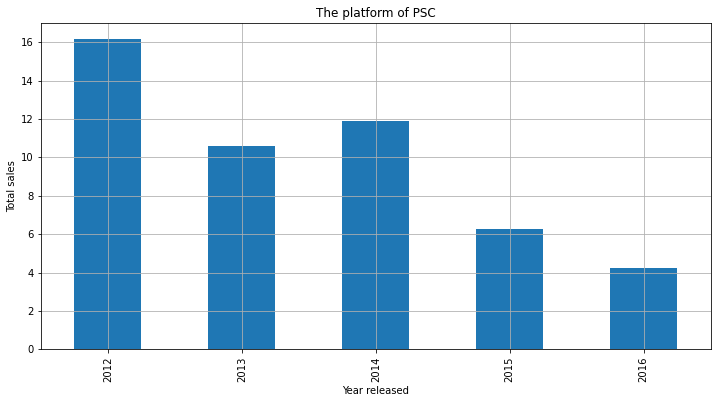

In [125]:
# The bar plot of the "PSV" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "PSV"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of PSC')
plt.show()

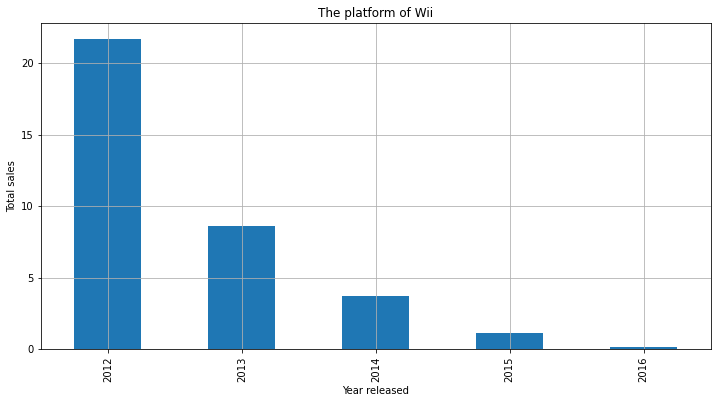

In [126]:
# The bar plot of the "Wii" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "Wii"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of Wii')
plt.show()

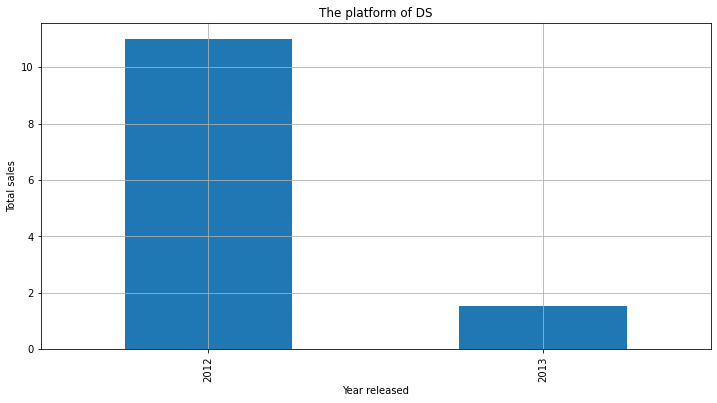

In [127]:
# The bar plot of the "DS" platform column with respect to 'year_of_release' and 'total_sales'.
games.query('platform == "DS"').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Year released')
plt.ylabel('Total sales')
plt.title('The platform of DS')
plt.show()

Except PS4 and XOne games are kindly growing while PS3, X360, 3DS, WiiU, PC, PSV, Wii and DS games are shrinking every year towards 2016. In 2017 PS4 and XOne will make sales and 3DS in a small amount will make sales too.  

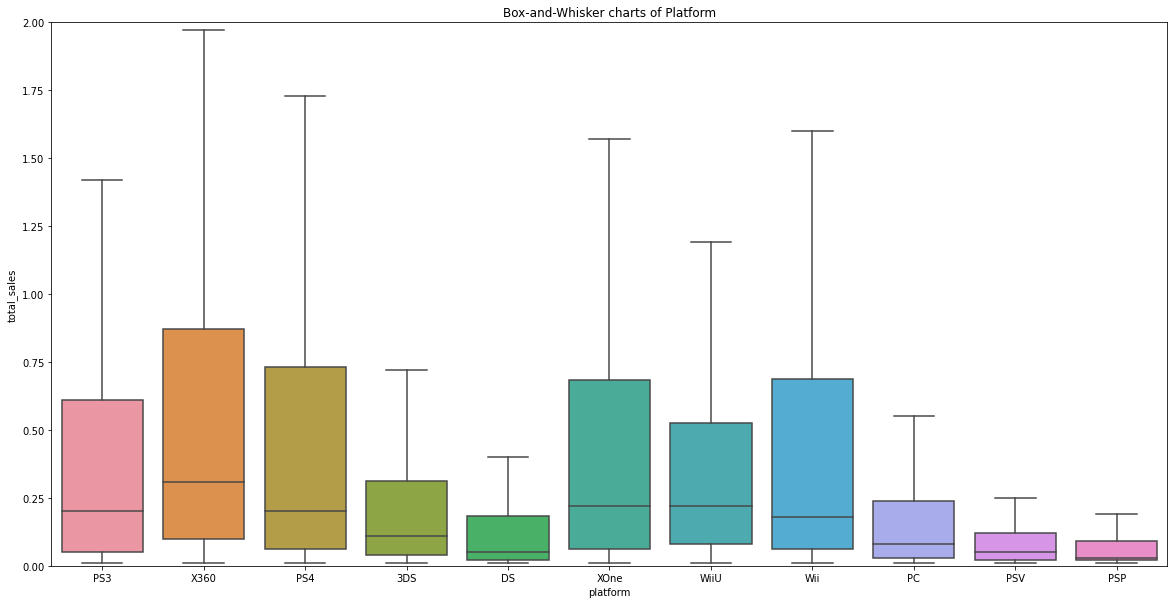

In [128]:
# Box-and-Whisker charts of Platform
plt.figure(figsize=(20,10))
plt.ylim(0,2)
sns.boxplot(x = 'platform', y = 'total_sales', data = games,
            showfliers = False).set(title = 'Box-and-Whisker charts of Platform')
plt.show()

Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [129]:
# Summary of the data
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [130]:
# DataFrame of PS4
games_ps4 = games.query('platform == "PS4"')
games_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


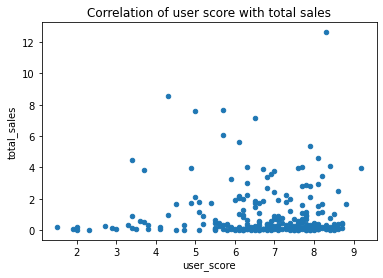

In [131]:
# correlation of 'user_score' with 'total_sales'
games_ps4.plot.scatter(x='user_score', y='total_sales', title='Correlation of user score with total sales')
plt.show()

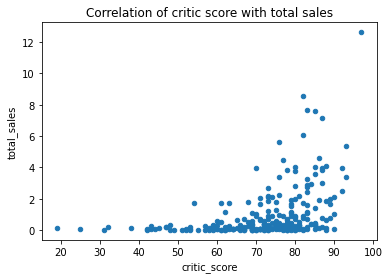

In [132]:
# correlation of 'critic_score' with 'total_sales'
games_ps4.plot.scatter(x='critic_score', y='total_sales', title='Correlation of critic score with total sales')
plt.show()

In [133]:
# Relationship among 'total_sales', 'user_score', and 'critic_score'
games_ps4 = games_ps4[['total_sales', 'user_score', 'critic_score']]
games_ps4.sample(5)

,total_sales,user_score,critic_score
14162,0.03,5.1,53.0
305,3.96,7.6,87.0
11414,0.09,NaN,NaN
15056,0.02,NaN,NaN
12965,0.05,3.5,52.0


In [134]:
# Correlation among the columns games_ps4
games_ps4.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


In [135]:
# Correlation between 'total_sales' and 'user_score'
games_ps4['user_score'].corr(games_ps4['total_sales'])

-0.031957110204556376

In [136]:
# Correlation between 'total_sales' and 'critic_score'
games_ps4['critic_score'].corr(games_ps4['total_sales'])

0.40656790206178095

In [137]:
# DataFrame of PS3
games_ps3 = games.query('platform == "PS3"')
games_ps3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46


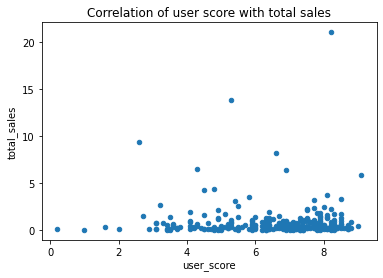

In [138]:
# correlation of 'user_score' with 'total_sales'
games_ps3.plot.scatter(x='user_score', y='total_sales', title='Correlation of user score with total sales')
plt.show()

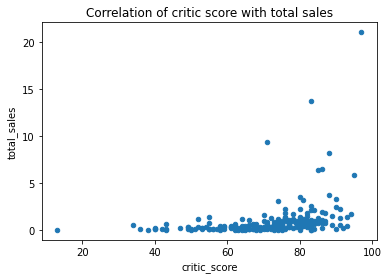

In [139]:
# correlation of 'user_score' with 'total_sales'
games_ps3.plot.scatter(x='critic_score', y='total_sales', title='Correlation of critic score with total sales')
plt.show()

In [140]:
# The relationship among 'total_sales', 'user_score', and 'critic_score'
games_ps3 = games_ps3[['total_sales', 'user_score', 'critic_score']]
games_ps3.sample(5)

,total_sales,user_score,critic_score
3609,0.56,3.4,NaN
14312,0.03,NaN,NaN
13851,0.04,NaN,NaN
9076,0.14,NaN,NaN
6239,0.28,6.7,58.0


In [141]:
# Correlation among the columns games_ps3
games_ps3.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.005144,0.331497
user_score,-0.005144,1.000000,0.539456
critic_score,0.331497,0.539456,1.000000


In [142]:
# DataFrame of X360
games_x360 = games.query('platform == "X360"')
games_x360.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2191,Rocksmith 2014,X360,2013,Misc,0.69,0.16,0.00,0.09,NaN,NaN,Unknown,0.94
8955,Earth Defense Force 2025,X360,2013,Shooter,0.06,0.03,0.05,0.01,68.0,8.1,M,0.15
3197,The Walking Dead: Survival Instinct,X360,2013,Shooter,0.46,0.11,0.00,0.05,32.0,4.0,M,0.62
4426,Transformers: Fall of Cybertron,X360,2012,Action,0.28,0.12,0.00,0.04,79.0,8.3,T,0.44
13617,Teenage Mutant Ninja Turtles: Mutants in Manha...,X360,2016,Action,0.01,0.03,0.00,0.00,NaN,4.3,T,0.04


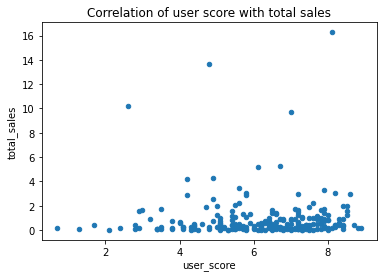

In [143]:
# correlation of 'user_score' with 'total_sales'
games_x360.plot.scatter(x='user_score', y='total_sales', title='Correlation of user score with total sales')
plt.show()

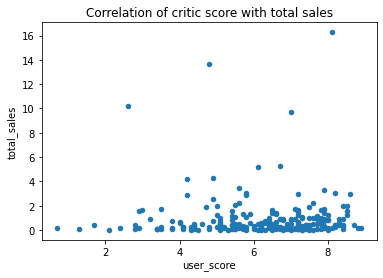

In [144]:
# correlation of 'cricic' with 'total_sales'
games_x360.plot.scatter(x='user_score', y='total_sales', title='Correlation of critic score with total sales')
plt.show()

In [145]:
# The relationship among 'total_sales', 'user_score', and 'critic_score' for X360
games_x360 = games_x360[['total_sales', 'user_score', 'critic_score']]
games_x360.sample(5)

,total_sales,user_score,critic_score
12641,0.05,7.5,58.0
2335,0.89,6.8,NaN
12005,0.07,6.6,NaN
3733,0.54,5.9,81.0
60,10.24,2.6,73.0


In [146]:
# Correlation among the columns games_x360
games_x360.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,0.006164,0.360573
user_score,0.006164,1.000000,0.557352
critic_score,0.360573,0.557352,1.000000


In [147]:
# DataFrame of XOne
games_xone = games.query('platform == "XOne"')
games_xone.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2543,Madden NFL 25,XOne,2013,Sports,0.67,0.05,0.0,0.08,73.0,5.9,E,0.80
4141,Rock Band 4,XOne,2015,Misc,0.38,0.04,0.0,0.05,79.0,6.4,T,0.47
6322,Rory McIlroy PGA Tour,XOne,2015,Action,0.16,0.09,0.0,0.02,60.0,4.3,E,0.27
9852,Tony Hawk's Pro Skater 5,XOne,2015,Sports,0.09,0.02,0.0,0.01,39.0,2.1,T,0.12
1180,Watch Dogs,XOne,2014,Action,0.90,0.53,0.0,0.14,78.0,5.8,M,1.57


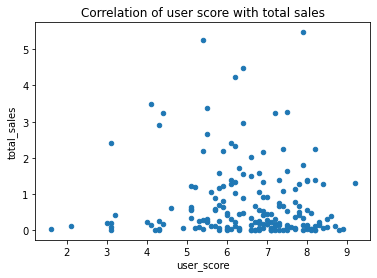

In [148]:
# correlation of 'user_score' with 'total_sales'
games_xone.plot.scatter(x='user_score', y='total_sales', title='Correlation of user score with total sales')
plt.show()

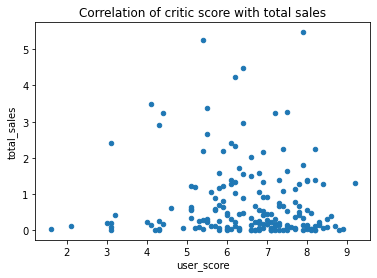

In [149]:
# correlation of 'cricic' with 'total_sales'
games_xone.plot.scatter(x='user_score', y='total_sales', title='Correlation of critic score with total sales')
plt.show()

In [150]:
# The relationship among 'total_sales', 'user_score', and 'critic_score' for XOne
games_xone = games_xone[['total_sales', 'user_score', 'critic_score']]
games_xone.sample(5)

,total_sales,user_score,critic_score
13413,0.04,8.1,87.0
1666,1.21,5.1,71.0
1176,1.57,6.8,78.0
5690,0.31,5.5,NaN
4668,0.42,6.0,76.0


In [151]:
# Correlation among the columns games_xone
games_xone.corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


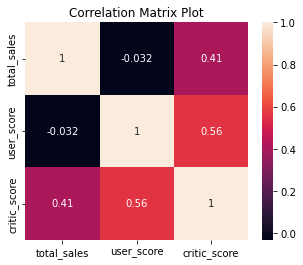

In [152]:
# correlation plots among the variables
plt.figure(figsize=(5, 4))
sns.heatmap(games_ps4.corr(), annot=True)
plt.title('Correlation Matrix Plot')
plt.show()

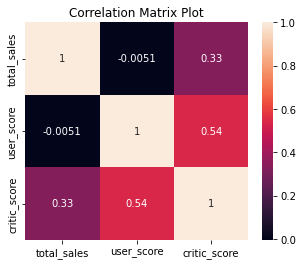

In [153]:
# correlation plots among the variables
plt.figure(figsize=(5, 4))
sns.heatmap(games_ps3.corr(), annot=True)
plt.title('Correlation Matrix Plot')
plt.show()

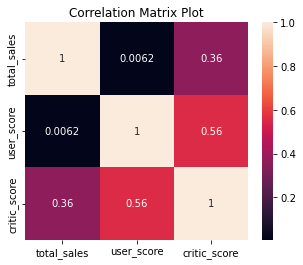

In [154]:
# correlation plots among the variables
plt.figure(figsize=(5, 4))
sns.heatmap(games_x360.corr(), annot=True)
plt.title('Correlation Matrix Plot')
plt.show()

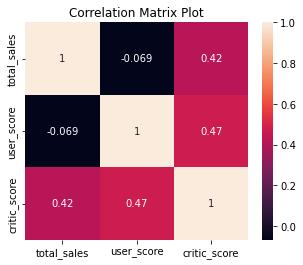

In [155]:
# correlation plots among the variables
plt.figure(figsize=(5, 4))
sns.heatmap(games_xone.corr(), annot=True)
plt.title('Correlation Matrix Plot')
plt.show()

As it is observed from the scattered plot, the correlation Coefficient and correlation matrix plot, there is little relationship between the sales and user review and the same is true also between sales and critical reviews of the platforms.

Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [156]:
# unique genres
games['genre'].nunique()

12

In [157]:
# unique genres
games['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

In [158]:
# Gruoping the 'genre' with respect to the 'total_sales'
games.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'count').sort_values(by = 'total_sales', ascending = False)

,total_sales
genre,
Action,1031
Role-Playing,370
Adventure,302
Sports,268
Shooter,235
Misc,192
Racing,115
Fighting,109
Platform,85


As it is observed from the distribution of games by gerne, the first three most profitable are Action with 1031, Role_Playin with 370, and Adventure with 302. The last three gernes with low sales are Simulation with 80, Strategy with 71 and Puzzle with 28.

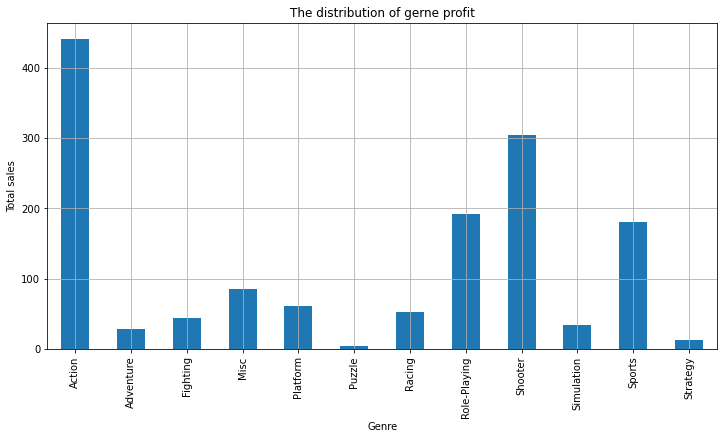

In [159]:
# The bar plot of the distribution of gerne with respect to 'total_sales'.
games.groupby('genre')['total_sales'].sum().plot(kind='bar', grid=True, figsize=(12,6))
plt.xlabel('Genre')
plt.ylabel('Total sales')
plt.title('The distribution of gerne profit')
plt.show()

In [160]:
# The mean value of 'genre' with respect to the 'total_sales'
games.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean').sort_values(by = 'total_sales', ascending = False)

,total_sales
genre,
Shooter,1.296723
Platform,0.717647
Sports,0.675634
Role-Playing,0.521081
Racing,0.465217
Misc,0.442917
Simulation,0.439000
Action,0.427856
Fighting,0.408165


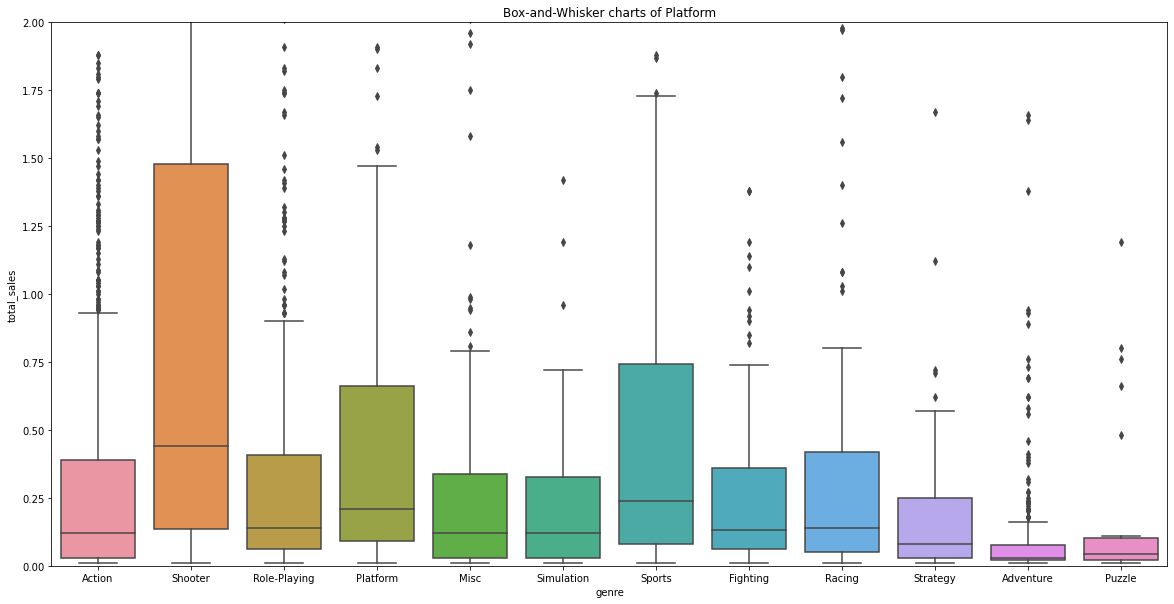

In [161]:
# Box-and-Whisker charts of Genre with respect to Total sales
plt.figure(figsize=(20,10))
plt.ylim(0,2)
sns.boxplot(x = 'genre', y = 'total_sales', data = games).set(title = 'Box-and-Whisker charts of Platform')
plt.show()

###### Conclusion

* In the 80's and early 90's the release of games were almost constant. From the mid of 90's the release of games were increasing and becomes maximum around 2007 - 2009.
* The top 10 'paltform' based on 'total_sales' are PS4, PS3, X360, 3DS, XOne, WiiU, PC, PSV, Wii, and DS.
* The platforms that used to be popular but now have zero sales are PS2, X360, PS3, Wii, DS, PS and PSP, but PS4, GBA and 3DS have some values in 2016.
* Refering to the graphs the new games took generally 2 to 3 years to appear. The old one start to get fade after staying being popular for 4 to 5 years.
* Except PS4 and XOne games are kindly growing while PS3, X360, Wii, DS, 3DS, PC, PSP, WiiU and PSV games are shrinking every year towards 2016. In 2017 PS4 and XOne will make sales and 3DS in a small amount will make sales too.
* All the platforms and genre have outliers but I used showfliers = False to cut them.
* There is little relationship between the sales and user review and the same is true also between sales and critical reviews of the platforms.
* As it is observed from the distribution of games by gerne, the first three most profitable are Action with 1031, Role_Playin with 370, and Adventure with 302. The last three gernes with low sales are Simulation with 80, Strategy with 71 and Puzzle with 28.


## User profile for each region


For each region (NA, EU, JP), determine:
The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?


In [162]:
# Top 5 platforms in the na_sales
games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

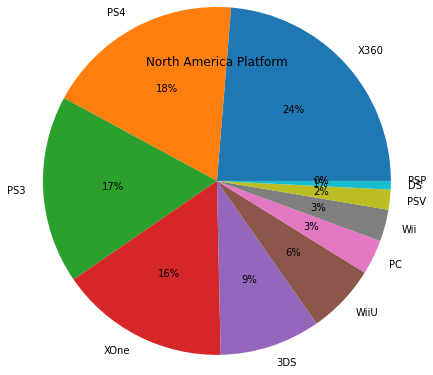

In [163]:
# Pie Chart
plt.pie(games.groupby('platform')['na_sales'].sum().sort_values(ascending=False), 
        labels = games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).index, radius = 2, 
        autopct = '%1.0f%%')
plt.title('North America Platform')
plt.show()

In [164]:
# Top 5 platforms in the eu_sales
games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

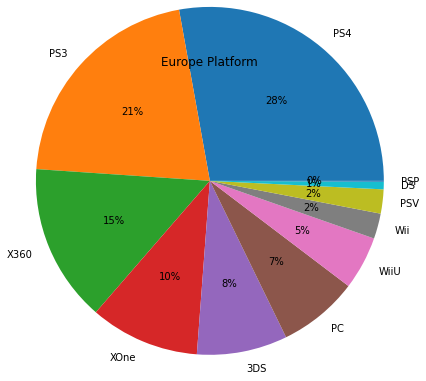

In [165]:
# Pie Chart
plt.pie(games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False), 
        labels = games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).index, radius = 2, 
        autopct = '%1.0f%%')
plt.title('Europe Platform')
plt.show()

In [166]:
# Top 5 platforms in the jp_sales
games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

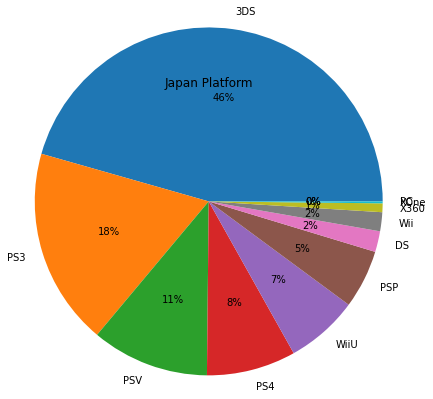

In [167]:
# Pie Chart
plt.pie(games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False), 
        labels = games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).index, radius = 2, 
        autopct = '%1.0f%%')
plt.title('Japan Platform')
plt.show()

In the North America X360 is leading platform and followed by PS4 and PS3, in Europe PS3 is leading and followed by PS3 and X360 where as in Japan 3DS is leading and followed by PS3 and PSP. In all regions PS3 is dominant.

In [168]:
# Top 5 genre in the na_sales
games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

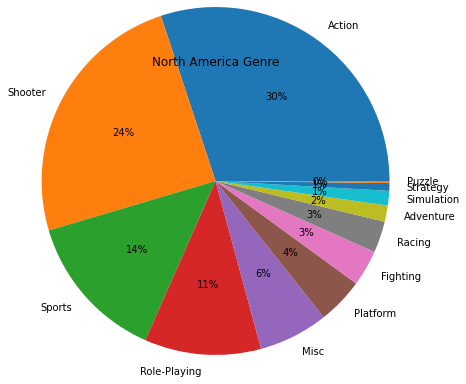

In [169]:
# Pie Chart
plt.pie(games.groupby('genre')['na_sales'].sum().sort_values(ascending=False), 
        labels = games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).index, radius = 2, 
        autopct = '%1.0f%%')
plt.title('North America Genre')
plt.show()

In [170]:
# Top 5 genre in the eu_sales
games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

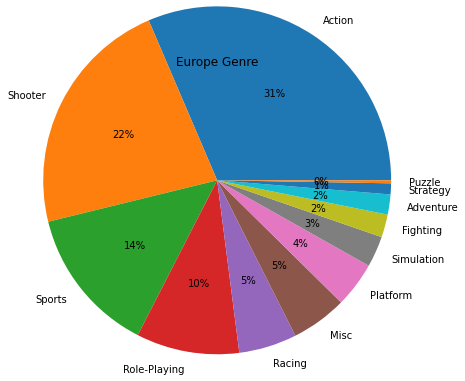

In [171]:
# Pie Chart
plt.pie(games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False), 
        labels = games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).index, radius = 2, 
        autopct = '%1.0f%%')
plt.title('Europe Genre')
plt.show()

In [172]:
# Top 5 genre in the jp_sales
games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

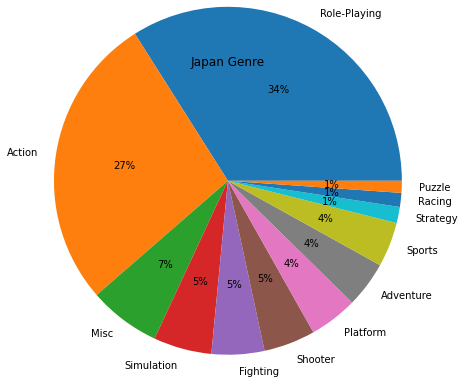

In [173]:
# Pie Chart
plt.pie(games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False), 
        labels = games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).index, radius = 2, 
        autopct = '%1.0f%%')
plt.title('Japan Genre')
plt.show()

In the North America Action is leading genre and followed by Shooter and Sports, in Europe Action is leading and followed by Shooter and Sports where as in Japan Role-Playing is leading and followed by Action and Misc. In all regions Action is dominant.

In [174]:
# Top 5 rating in the na_sales
games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
M          231.57
E          114.37
Unknown    103.31
E10+        75.70
T           66.02
Name: na_sales, dtype: float64

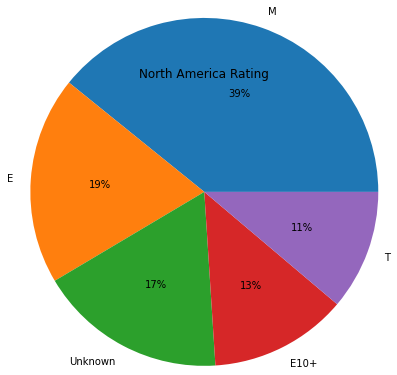

In [175]:
# Pie Chart
plt.pie(games.groupby('rating')['na_sales'].sum().sort_values(ascending=False), 
        labels = games.groupby('rating')['na_sales'].sum().sort_values(ascending=False).index, radius = 2, 
        autopct = '%1.0f%%')
plt.title('North America Rating')
plt.show()

In [176]:
# Top 5 rating in the eu_sales
games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
M          193.96
E          113.03
Unknown     91.50
E10+        55.37
T           52.96
Name: eu_sales, dtype: float64

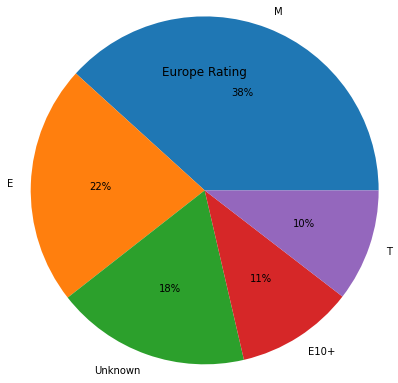

In [177]:
# Pie Chart
plt.pie(games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False), 
        labels = games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).index, radius = 2, 
        autopct = '%1.0f%%')
plt.title('Europe Rating')
plt.show()

In [178]:
# Top 5 rating in the jp_sales
games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)

rating
Unknown    108.84
E           28.33
T           26.02
M           21.20
E10+         8.19
Name: jp_sales, dtype: float64

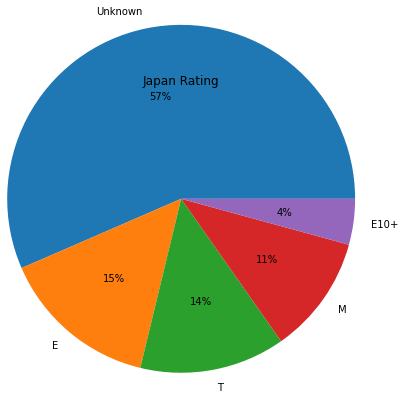

In [179]:
# Pie Chart
plt.pie(games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False), 
        labels = games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).index, radius = 2, 
        autopct = '%1.0f%%')
plt.title('Japan Rating')
plt.show()

In the North America M is the leading rate and followed by E and Unknown, in Europe M is the leading rate and followed by E and Unknown where as in Japan Unknown is leading rate and followed by E and M
T. In all regions E is dominant.

###### Conclusion

* In the North America X360 is leading platform and followed by PS4 and PS3, in Europe PS3 is leading and followed by PS3 and X360 where as in Japan 3DS is leading and followed by PS3 and PSP. In all regions PS3 is dominant.


* In the North America Action is leading genre and followed by Shooter and Sports, in Europe Action is leading and followed by Shooter and Sports where as in Japan Role-Playing is leading and followed by Action and Misc. In all regions Action is dominant.


* In the North America M is the leading rate and followed by E and Unknown, in Europe M is the leading rate and followed by E and Unknown where as in Japan Unknown is leading rate and followed by E and T. In all regions E is dominant.

## Test statistical hypotheses

Comparing the average user ratings of the Xbox One and PC platforms alone is not enough to make decission, we need to perform a statistical test using hypothesis on the equality of two population.

In order to test the hypothesis of two statistical population that are equal based on the sample we use,

scripy.stats.ttest_ind(array1, array2, equal_var)



###### Hypotheses 1

Average user ratings of the Xbox One and PC platforms are the same.



Based on this one, we can formulate:

Null hypothesis H0: Average user ratings of the Xbox One and PC platforms are the same.

Alternative hypothesis H1: Average user ratings of the Xbox One and PC platforms are not the same.

Alpha value will be 5%.

Statistical test is: Hypothesis on equality of two population.


In [180]:
# Test the hypotheses
# The two DataFrames to be tested are 
# if the p-value is less than alpha, we reject the hypothesis

games_xone_hypothesis = games.query('platform == "XOne"')
games_pc_hypothesis = games.query('platform == "PC"')

alpha = 0.05  # critical statistical significance level

results = st.ttest_ind(games_xone_hypothesis['user_score'], games_pc_hypothesis['user_score'], nan_policy='omit')

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 


p-value:  0.5535080500642724
We can't reject the null hypothesis


In [181]:
games_xone_hypothesis['user_score'].mean()

6.52142857142857

In [182]:
games_pc_hypothesis['user_score'].mean()

6.428640776699027

In [183]:
# Variance value
games_xone_hypothesis['user_score'].var()

1.9069968429360702

In [184]:
# Variance value
games_pc_hypothesis['user_score'].var()

2.7704439971584156

###### Conclusion

The value of alpha is 0.05 and from the above result the p-value is greater than alpha so the Null hypothesis will not be rejected because the average user ratings of the Xbox One and PC platforms are almost the same. That is,  average user ratings of the Xbox One and PC platforms are 6.521428571428572 and 6.428640776699029 respectively, which are almost the same. There is no evidence to reject the null hypothesis.

The variance ratings of the Xbox One and PC platforms are 1.9069968429360695 and 2.770443997158418 respectively


Comparing the average user ratings of the Action and Sports gernes alone is not enough to make decission, we need to perform a statistical test using hypothesis on the equality of two population.

In order to test the hypothesis of two statistical population that are equal based on the sample we use,

scripy.stats.ttest_ind(array1, array2, equal_var)



###### Hypotheses 2

Average user ratings for the Action and Sports genres are different.


Based on this one, we can formulate:

Null hypothesis H0: Average user ratings for the Action and Sports genres are the same.

Alternative hypothesis H1: Average user ratings for the Action and Sports genres are different.

Alpha value will be 5%.

Statistical test is: Hypothesis on equality of two population.

In [185]:
# Test the hypotheses
# The two DataFrames to be tested are 
# if the p-value is less than alpha, we reject the hypothesis

games_action_hypothesis = games.query('genre == "Action"')
games_sports_hypothesis = games.query('genre == "Sports"')

alpha = 0.05  # critical statistical significance level

results = st.ttest_ind(games_action_hypothesis['user_score'], games_sports_hypothesis['user_score'], nan_policy='omit')

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 


p-value:  3.716308946093586e-26
We reject the null hypothesis


In [186]:
# Mean value
games_action_hypothesis['user_score'].mean()

6.825047801147237

In [187]:
# Mean value
games_sports_hypothesis['user_score'].mean()

5.455897435897437

In [188]:
# Variance value
games_action_hypothesis['user_score'].var()

1.8890840494348116

In [189]:
# Variance value
games_sports_hypothesis['user_score'].var()

3.022890298704733

###### Conclusion

The value of alpha is 0.05 but from the above result the p-value is much less than alpha so the Null hypothesis will be rejected because average user ratings for the Action and Sports genres are not the same, which means that the averages of both user rating for the Action and Sports genres are different. 
The average values of rating for the Action and Sports gernes are 6.825047801147227 and 5.455897435897437 respectively, which are different.

The variance ratings of the Action and Sports genres are 1.8890840494348111 and 3.022890298704732 respectively


## General conclusion

The aim of the project is to analyse data of Megaline company for the Surf or Ultimate plans in order to help them to adjust the advertising budjet of the company.

The data of the project are given in: /datasets/games.csv

* The DataFrame games has 16715 rows and 11 columns. 
* The DataFrame has object and float64 data types. 
* It is confirmed the DataFrame has no duplicates in the data.
* The DataFrame has missing values on Name, Platform, Year_of_release, Genre, Critic_score and Rating. 
* The DataFrame replaced the column names with lowercase. 
* Six variables had missing values out of eleven.
* The 'name', 'year_of_release' and 'genre' were dropped from the DataFrame as they were less than 10% of the data.
* The 'critic_score', 'user_score' and 'rating' column NaN values are left as they were in order not to get distorted data.
* The number of "tbd" values in the column 'user_score' were 2424 and they are converted into NaN value.
* The data type of 'year_of_release' converted from float64 into int64.
* The data type of 'user_score' converted from object into float64.
* A new column 'total_sales' created in the DataFrame "games".

As it is observed from the scattered plot, the correlation Coefficient and correlation matrix plot, there is little relationship between the sales and user review and the same is true also between sales and critical reviews of the platforms.


For the region of North America, Europe, Japan platform, genre and rating look as follows


* In the North America X360 is leading platform and followed by PS4 and PS3, in Europe PS3 is leading and followed by PS3 and X360 where as in Japan 3DS is leading and followed by PS3 and PSP. In all regions PS3 is dominant.


* In the North America Action is leading genre and followed by Shooter and Sports, in Europe Action is leading and followed by Shooter and Sports where as in Japan Role-Playing is leading and followed by Action and Misc. In all regions Action is dominant.
  
* In the North America M is the leading rate and followed by E and Unknown, in Europe M is the leading rate and followed by E and Unknown where as in Japan Unknown is leading rate and followed by E and T. In all regions E is dominant.

The two Hypotheses of the project are:

1. Average user ratings of the Xbox One and PC platforms are the same.

2. Average user ratings for the Action and Sports genres are different.


The value of alpha is 0.05 and from the above result the p-value is greater than alpha so the Null hypothesis will not be rejected because the average user ratings of the Xbox One and PC platforms are almost the same. That is,  average user ratings of the Xbox One and PC platforms are 6.521428571428572 and 6.428640776699029 respectively, which are almost the same. There is no evidence to reject the null hypothesis.

The variance ratings of the Xbox One and PC platforms are 1.9069968429360695 and 2.770443997158418 respectively


The value of alpha is 0.05 but from the above result the p-value is much less than alpha so the Null hypothesis will be rejected because average user ratings for the Action and Sports genres are not the same, which means that the averages of both user rating for the Action and Sports genres are different. 
The average values of rating for the Action and Sports gernes are 6.825047801147227 and 5.455897435897437 respectively, which are different.

The variance ratings of the Action and Sports genres are 1.9069968429360695 and 2.770443997158418 respectively

